# Measuring the Distance to and Age of an Open Cluster

At this point you should have read through the manual accompanying this lab, and have a grasp on the relevant concepts. We'll now begin exploring and implementing these concepts computatioanlly

The introductory Python labs should also have provided you with an elementory grasp on Python. If you don't understand all the code in here, don't worry! You don't need to know the specifics of what's going on, and comments throuhgout the lab will give you an overview of what we're doing at any given time.

### The `.FITS` file format
By large, astronomers record, disseminate, and read observational data throuhg `.fits` files. This file format is an extremely useful way to divide several relevant data tables about an object and compile them into a single file.

A FITS file will typically have

In [1]:
# We'll import the relevant Python libraries here.

from astropy.io import fits # a popular Python pckage among astronomers to interact with .fits files

import pandas as pd # a powerful data analysis packag
import numpy as np # *the* Python package for everythng maths
import matplotlib.pyplot as plt # plotting and data visulisation

In [2]:
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')

In [3]:
# We've downloaded photometric data for the Open Cluster NGC 752 from the database
# 'Photometry and radial velocities in NGC752 (Daniel+, 1994)' though the astronomical catalogue
# service VizieR
stars_fits = fits.open('Daniel1994_NGC752/daniel1994_ngc752_photometry.fit')

# FITS files generally have an info() method which tells us a little bit about the structure of the file
print(stars_fits.info())

Filename: Daniel1994_NGC752/daniel1994_ngc752_photometry.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  J_PASP_106_281_tables    1 TableHDU       157   255R x 32C   [F11.7, F11.7, I8, A4, A11, A11, F6.3, F6.3, I2, F6.3, F6.3, I2, I4, I2, A3, A1, I1, I3, A1, I3, F5.2, F5.1, A1, I1, F5.1, A1, F5.1, I2, I3, I3, A1, A15]   
None


 offset=25                                                                       [astropy.io.fits.card]


Now, the output above might look a bit complicated, but we certainly don't have to understand all of it. It shows that there are 2 HDUs (tables) within the FITS file. The first HDU is basically a metadata HDU with all sorts of information about what's included in the file. Headerst generally have a `header` and a `data` attribute. The header has the metadata for the HDU (what quantities do different column names signify, what the units are, etc.) and the data has, well, the data. We'll print out HDU0's data below. 

In [4]:
hdu0 = stars_fits[0]
hdu0.header

SIMPLE  =                    T / Standard FITS Format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No Image --- just extension(s)                 
EXTEND  =                    T / There are standard extensions                  
ORIGIN  = 'xml2fits_v1.95'     / Converted from XML-Astrores to FITS            
                         e-mail: question@simbad.u-strasbg.fr                   
LONGSTRN= 'OGIP 1.0'           / Long string convention (&/CONTINUE) may be used
DATE    = '2022-05-31'         / Written on 2022-05-31:05:07:07 (GMT)           
                             by: www-data@vizier.astro.unistra.fr               
         **********************************************************             
             EXCERPT from catalogues stored in VizieR (CDS)                     
                        with the following conditions:                          
         *******************

Let's now print the HDU1 header

In [5]:
hdu1 = stars_fits[1]
hdu1.header

XTENSION= 'TABLE   '           / Ascii Table Extension (TAB and NEWLINE sep)    
BITPIX  =                    8 / Character data                                 
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  182 / Number of bytes per record                     
NAXIS2  =                  255 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                   32 / Number of data fields (columns)                
CDS-CAT = 'J/PASP/106/281'     / Catalogue designation in CDS nomenclature      
         Photometry and radial velocities in NGC752 (Daniel+, 1994)             
EXTNAME = 'J_PASP_106_281_tables' / Identification of the table                 
CDS-NAME= 'J/PASP/106/281/tables' / Table name in METAtab                       
         Data for NGC 752 (t

Now this is informative but not all that useful. Let's see what HDU1's data looks like. We'll display the data in a Pandas DataFrame (which makes it very easy to view and manipulate).

In [6]:
star_df = pd.DataFrame(hdu1.data)
star_df

,_RAJ2000,_DEJ2000,recno,ID,RA2000,DE2000,Vmag,e_Vmag,o_Vmag,B-V,...,n_RVPsh,o_RVPsh,RV,u_RV,e_RV,o_RV,RuID,RvID,MC,Note
0,28.329417,37.984833,1,15,01 53 19.06,+37 59 05.4,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
1,28.405333,37.404806,2,37,01 53 37.28,+37 24 17.3,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
2,28.607250,38.009139,3,134,01 54 25.74,+38 00 32.9,12.084,0.012,3,0.506,...,,0,0.0,,0.0,0,401,497,-,\r
3,28.629333,37.492111,4,143,01 54 31.04,+37 29 31.6,11.140,0.000,0,0.470,...,,0,0.0,,0.0,0,0,178,0,\r
4,28.652583,37.440583,5,155,01 54 36.62,+37 26 26.1,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,30.091583,38.044722,251,1474,02 00 21.98,+38 02 41.0,10.698,0.009,2,0.355,...,,0,0.0,,0.0,0,0,0,+,\r
251,30.274875,37.706556,252,1602,02 01 05.97,+37 42 23.6,9.961,0.011,2,0.462,...,,0,0.0,,0.0,0,0,0,0,\r
252,30.307083,37.954917,253,1626,02 01 13.70,+37 57 17.7,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
253,30.295167,37.171250,254,1627,02 01 10.84,+37 10 16.5,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r


The PD DataFrame shows information for 255 stars. There are several columns. `RA` and `DEC` are sky coordinates for the star. `Bmag` and `Vmag` are the apparent magnitudes in the B and V colour bands. `B-V` is the colour index (just the subtraction of B and V band magnitudes). `PlatPR` is the membership probability for each stars (see the HDU1 header information above).

**[Q] Why do you think there is a column for the membership probabilty each star?**

In [7]:
# We'll only consider stars which have a membership probability greater than 50%
star_df = star_df[star_df['PlatPR'] > .5]
star_df

,_RAJ2000,_DEJ2000,recno,ID,RA2000,DE2000,Vmag,e_Vmag,o_Vmag,B-V,...,n_RVPsh,o_RVPsh,RV,u_RV,e_RV,o_RV,RuID,RvID,MC,Note
0,28.329417,37.984833,1,15,01 53 19.06,+37 59 05.4,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
1,28.405333,37.404806,2,37,01 53 37.28,+37 24 17.3,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
3,28.629333,37.492111,4,143,01 54 31.04,+37 29 31.6,11.140,0.000,0,0.470,...,,0,0.0,,0.0,0,0,178,0,\r
4,28.652583,37.440583,5,155,01 54 36.62,+37 26 26.1,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
12,28.736292,37.974694,13,215,01 54 56.71,+37 58 28.9,11.400,0.000,0,0.430,...,,0,0.0,,0.0,0,0,354,+,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,30.091583,38.044722,251,1474,02 00 21.98,+38 02 41.0,10.698,0.009,2,0.355,...,,0,0.0,,0.0,0,0,0,+,\r
251,30.274875,37.706556,252,1602,02 01 05.97,+37 42 23.6,9.961,0.011,2,0.462,...,,0,0.0,,0.0,0,0,0,0,\r
252,30.307083,37.954917,253,1626,02 01 13.70,+37 57 17.7,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r
253,30.295167,37.171250,254,1627,02 01 10.84,+37 10 16.5,0.000,0.000,0,0.000,...,,0,0.0,,0.0,0,0,0,0,\r


We can see that left us with 159 stars. Still plenty! Additionally among some of these stars, the B and V band magnitudes aren't listed and are zeroed out. We won't look at those. Let's make an H-R diagram out of this!

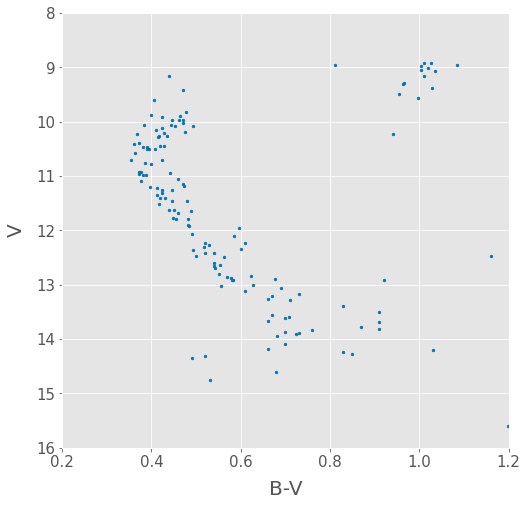

In [8]:
# We'll take 'B-V' and 'Vmag' columns in star_df and put them in numpy arrays
BminusV_array = star_df['B-V'].to_numpy()
V_array = star_df['Vmag'].to_numpy()

# now we'll plot them with Matplotlib!
plt.figure(figsize=(8, 8)) #create an 8x8 canvas
plt.scatter(BminusV_array, V_array, s=8) # create a scatterplot with B-V on the x-axis and V on the y-axis. 's' is point size. mess around with it if you like!

plt.ylim(8, 16) # we don't want to see the full range of y values. This limit will do.
plt.xlim(0.2, 1.2) # similarly, we only need to see a section of the x-axis

plt.ylabel('V', size=20, labelpad=10) #add a y-axis label
plt.xlabel('B-V', size=20, labelpad=10) #add an x-axis label

plt.yticks(size=15) #increase the y-axis tick size
plt.xticks(size=15) #increase the x-axis tick size

plt.gca().invert_yaxis() #finally, we want to invert the y-axis

**[Q] Why did we invert the y-axis in the plot above?**

### The Distance Modulus

You should be aware of the distance modulus formula by now. We will now use it to figure out the distance to NGC 752!

**[Q] firstly, let's explore how you can write formulas in Markdown! Take the distance modulus formula and write it in mathematical notation in the cell below.**

You can click on the cell and then click on Code/Markdown dropdown from the toolbar above. Make sure that you select `Markdown` so Jupyter knows you're not trying to write Pythonic code! Then, you can enclose whatever equation you want to in 'dollar' signs. For ecample, $E = m c^2$. For a list of different mathematical symbols in Markdown/LaTex, see [here](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/). For a more in-depth tutorial, see [here](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214).

Now that we have the formula, we can easily figure out the distance to an object by knowing the difference between the apparent and absolute magnitudes. We could do this on paper, but let's make a formula to do this instead. You may want to use the function template below which takes in $m-M$ as an input. Take note of the distance units given by the formula, and retun the distance in lightyears.

In [9]:
def distance_modulus(m_minus_M):
    #code here
    
    return #distance

### Now we'll import MIST isochrones on here and try to fit them over our H-R Diagram

In [10]:
# These next two lines add the directory of `read_mist_models` script to the path (basically telling Python where the script is)
import sys
sys.path.append('MIST/')

import read_mist_models #we can now import the script!

In [11]:
# `read_mist_models` helps us read pre-computed MIST isochrone files. Below we import a relevant isochrone file
isocmd = read_mist_models.ISOCMD('MIST/synthetic_photometry/MIST_v1.2_vvcrit0.4_UBVRIplus/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd')

Reading in: MIST/synthetic_photometry/MIST_v1.2_vvcrit0.4_UBVRIplus/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd


In [12]:
# We'll just print out some information about the isochrone file we just imported. You can see that this file contains
# theoretical colour-magnitude diagrams for a stellar population with v/v_crit=0.4 and metallicity [Fe/H]=-0.25 at
# different points in time.
print('version: ', isocmd.version)
print('photometric system: ', isocmd.photo_sys)
print('abundances: ', isocmd.abun)
print('rotation: ', isocmd.rot)
print('ages: ', [round(x,2) for x in isocmd.ages]) #Ages in units of log(Age [years])
print('number of ages: ', isocmd.num_ages)
print('available columns: ', isocmd.hdr_list)
print('Av extinction: ', isocmd.Av_extinction)

version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)
abundances:  {'Yinit': 0.261, 'Zinit': 0.00803343, '[Fe/H]': -0.25, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Be

In [13]:
from matplotlib.widgets import Slider, Button # we'll need this to make an easy slider

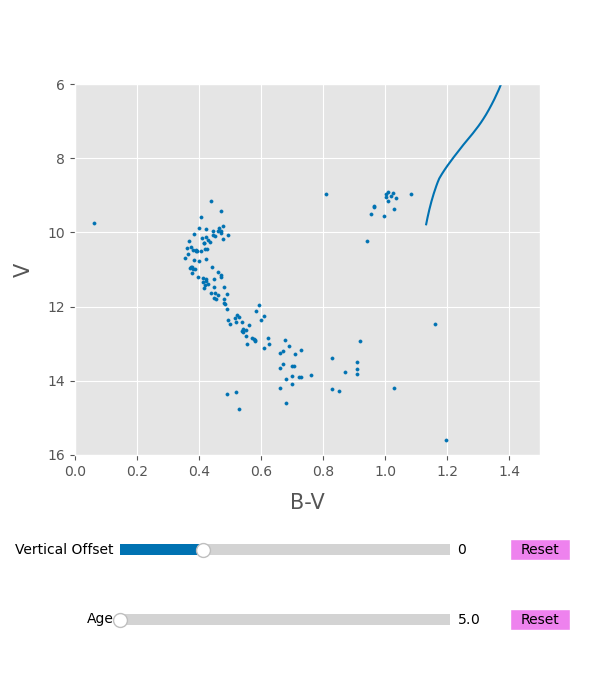

In [14]:
# You don't need to understand the plotting process below, we're just interested in the resulting slider widget
%matplotlib widget

fig = plt.figure(figsize=(6, 7))
ax = fig.subplots()
plt.subplots_adjust(bottom=0.35)

minage = min(isocmd.ages)
maxage = max(isocmd.ages)

# We'll B and V magnitudes at log(Age)=minage from the MIST model
age_ind = isocmd.age_index(minage)
B_theory = isocmd.isocmds[age_ind]['Bessell_B']
V_theory = isocmd.isocmds[age_ind]['Bessell_V']
p, = ax.plot(B_theory - V_theory, V_theory)

ax.scatter(BminusV_array, V_array, s=5)

plt.ylabel('V', size=15, labelpad=10) #add a y-axis label
plt.xlabel('B-V', size=15, labelpad=10) #add an x-axis label
plt.ylim(6, 16)
plt.xlim(0, 1.5)
plt.gca().invert_yaxis()

dax = plt.axes([0.2, 0.2, 0.55, 0.03])
ageax = plt.axes([0.2, 0.1, 0.55, 0.03])

d_slider = Slider(dax, 'Vertical Offset', valmin=-5, valmax=15, valinit=0, valstep=0.05)
age_slider = Slider(ageax, 'Age', valmin=minage, valmax=maxage, valinit=minage, valstep=0.05)

def update(val):
    age_ind = isocmd.age_index(age_slider.val)
    B = isocmd.isocmds[age_ind]['Bessell_B']
    V = isocmd.isocmds[age_ind]['Bessell_V']
    
    p.set_xdata(B - V)
    p.set_ydata(V + d_slider.val)
    fig.canvas.draw_idle()
    
d_slider.on_changed(update)
age_slider.on_changed(update)

reset_d = plt.axes([0.85, 0.2, 0.1, 0.03])
reset_age = plt.axes([0.85, 0.1, 0.1, 0.03])

d_button = Button(reset_d, 'Reset', color='violet', hovercolor='purple')
age_button = Button(reset_age, 'Reset', color='violet', hovercolor='purple')

def resetDSlider(event):
    d_slider.reset()
    
def resetAgeSlider(event):
    age_slider.reset()

d_button.on_clicked(resetDSlider)
age_button.on_clicked(resetAgeSlider)

plt.show()

Now that you've noted down the vertical offset and age of the cluster in $\log(Age [])$, we'll use functions to display the age and distance in useful units.

In the cell below, create a function which takes in $\log(Age)$ and outputs the age in years.

In [15]:
your_offset = 0
your_age = 0

In [16]:
def log_age2years(log_age):
    # code here
    
    return #age

print('The age of NGC 752 appears to be', log_age2years(your_age), 'years.')
print('The distace to NGC 752 appears to be', distance_modulus(your_offset), 'lightyears.')

The age of NGC 752 appears to be None years.
The distace to NGC 752 appears to be None lightyears.


Finally, look up the actual age and distance for NGC 752. How do they compare with the figures you've estimated?